In [9]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.__version__

'1.1.5'

In [10]:
import os
os.getcwd()

'/content'

In [11]:
#Mouting the drive to load a simple dataset stored on the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
#Loading a dataset into a dataframe
HTRU = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/HTRU Data/HTRU_2.csv")
print('Dataset Loaded...')


Dataset Loaded...


In [13]:
# assign columns name
HTRU.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 
              'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

In [14]:
HTRU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean_profile      17897 non-null  float64
 1   std_profile       17897 non-null  float64
 2   kurtosis_profile  17897 non-null  float64
 3   skewness_profile  17897 non-null  float64
 4   mean_dmsnr        17897 non-null  float64
 5   std_dmsnr         17897 non-null  float64
 6   kurtosis_dmsnr    17897 non-null  float64
 7   skewness_dmsnr    17897 non-null  float64
 8   target            17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [15]:
HTRU.describe()

mean_profile   std_profile  ...  skewness_dmsnr       target
count  17897.000000  17897.000000  ...    17897.000000  17897.00000
mean     111.078321     46.549021  ...      104.859419      0.09158
std       25.652705      6.843040  ...      106.517270      0.28844
min        5.812500     24.772042  ...       -1.976976      0.00000
25%      100.929688     42.375426  ...       34.957119      0.00000
50%      115.078125     46.946435  ...       83.068996      0.00000
75%      127.085938     51.022887  ...      139.310905      0.00000
max      192.617188     98.778911  ...     1191.000837      1.00000

[8 rows x 9 columns]

In [16]:
# check null values
HTRU.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

In [17]:
#Use iloc to acces each row, index starts at 0 
HTRU.iloc[0:5]

mean_profile  std_profile  ...  skewness_dmsnr  target
0    102.507812    58.882430  ...      127.393580       0
1    103.015625    39.341649  ...       63.171909       0
2    136.750000    57.178449  ...       53.593661       0
3     88.726562    40.672225  ...      252.567306       0
4     93.570312    46.698114  ...      131.394004       0

[5 rows x 9 columns]

In [18]:
HTRU['target'].value_counts()

0    16258
1     1639
Name: target, dtype: int64

In [19]:
#percentage of target
HTRU['target'].value_counts()/HTRU.shape[0]*100

0    90.842041
1     9.157959
Name: target, dtype: float64

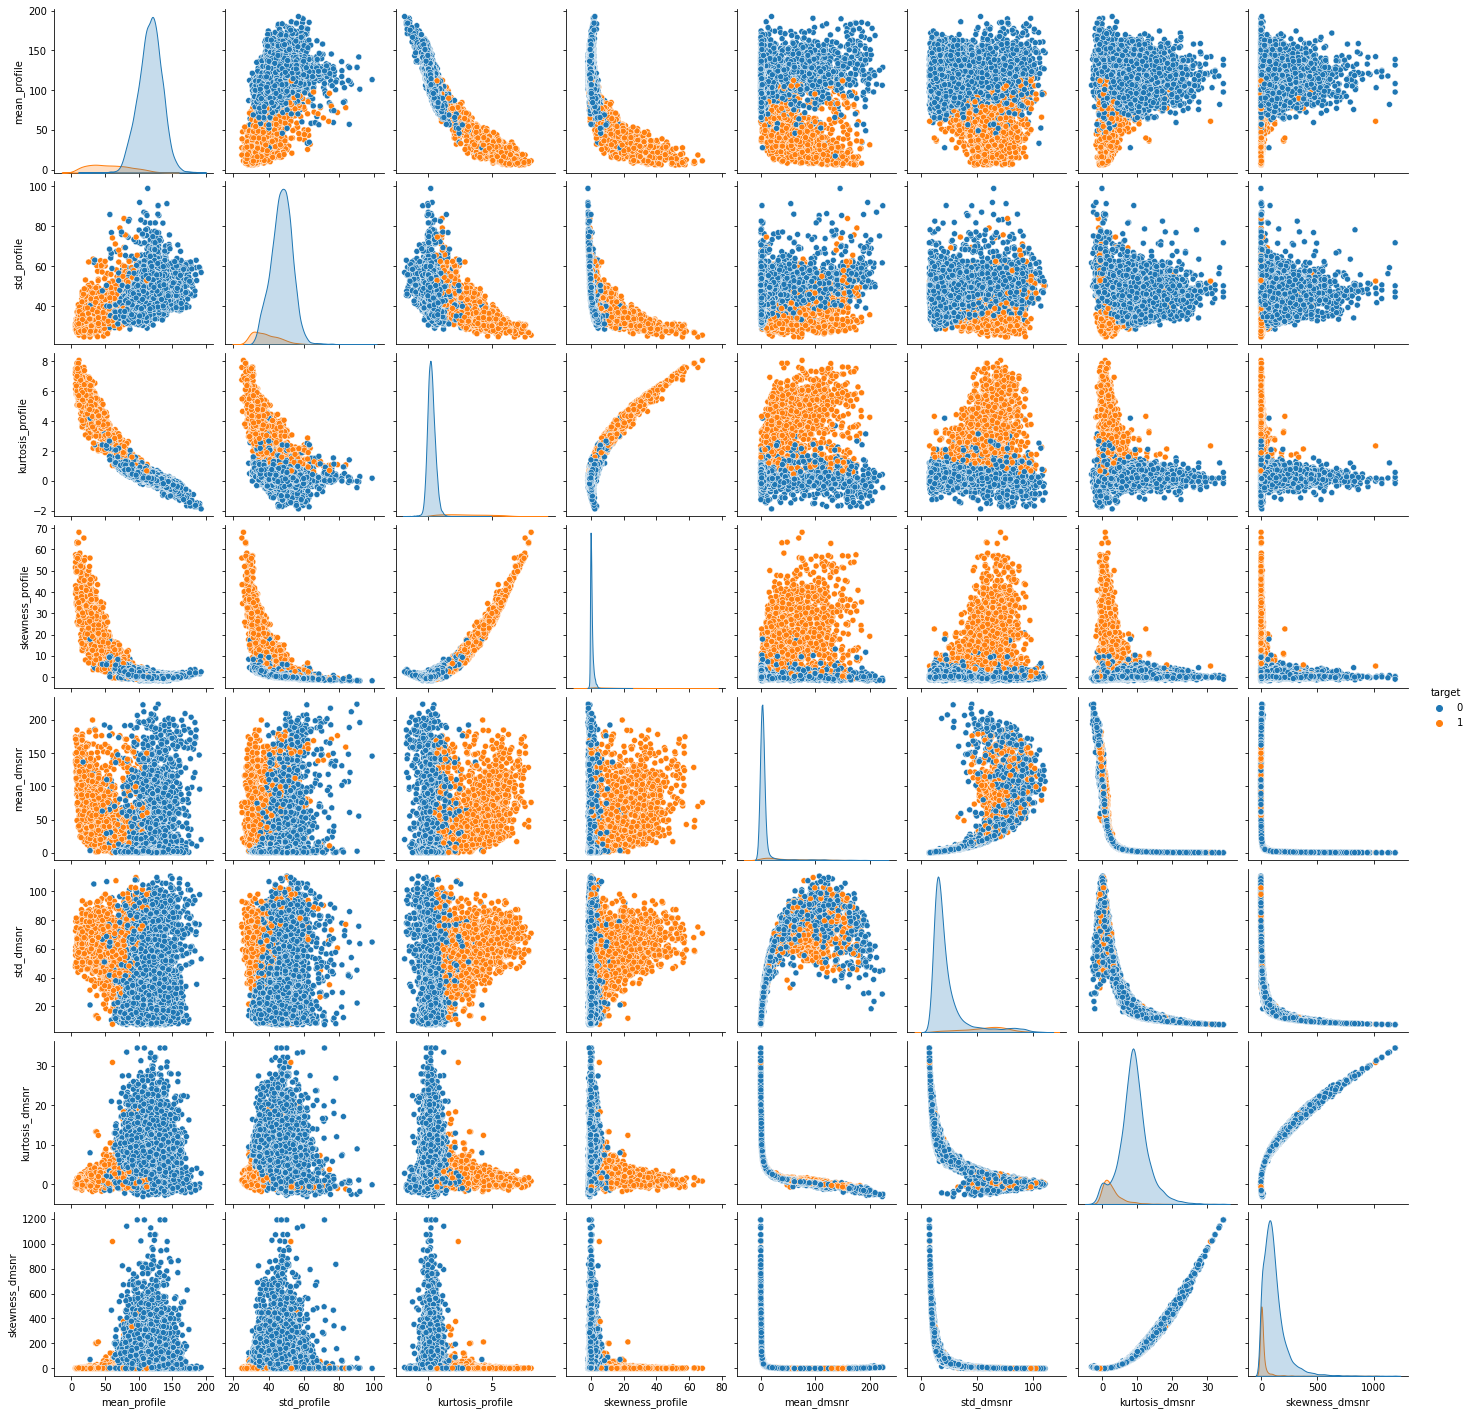

In [20]:
sns.pairplot(HTRU, hue='target')

In [21]:
#Take data without target value
HTRU_X = HTRU[['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr']]

In [22]:
HTRU_X.head()

mean_profile  std_profile  ...  kurtosis_dmsnr  skewness_dmsnr
0    102.507812    58.882430  ...       10.576487      127.393580
1    103.015625    39.341649  ...        7.735822       63.171909
2    136.750000    57.178449  ...        6.896499       53.593661
3     88.726562    40.672225  ...       14.269573      252.567306
4     93.570312    46.698114  ...       10.621748      131.394004

[5 rows x 8 columns]

In [23]:
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
#https://www.analyticsvidhya.com/blog/2020/10/a-simple-explanation-of-k-means-clustering/
#https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix 

In [24]:
#finding optimum number of clusters by using ELBOW method
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(HTRU_X) 
    wcss.append(kmeans.inertia_)

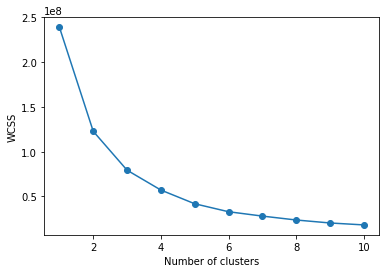

In [25]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

The point at which the elbow shape is created is 2, that is, our K value or an optimal number of clusters is 2. Now let’s train the model on the dataset with a number of clusters 2.

In [26]:
kmeans = KMeans(n_clusters = 2, random_state = 42).fit(HTRU_X)

In [27]:
#get predicted label by cluster
labels = pd.DataFrame(kmeans.labels_)
labels

0
0      0
1      0
2      0
3      1
4      0
...   ..
17892  1
17893  0
17894  0
17895  0
17896  0

[17897 rows x 1 columns]

In [28]:
labeledCluster = pd.concat((HTRU_X, labels), axis=1)
labeledCluster = labeledCluster.rename({0:'labels'}, axis = 1)
labeledCluster.iloc[0:10]


mean_profile  std_profile  ...  skewness_dmsnr  labels
0    102.507812    58.882430  ...      127.393580       0
1    103.015625    39.341649  ...       63.171909       0
2    136.750000    57.178449  ...       53.593661       0
3     88.726562    40.672225  ...      252.567306       1
4     93.570312    46.698114  ...      131.394004       0
5    119.484375    48.765059  ...      479.756567       1
6    130.382812    39.844056  ...      198.236457       1
7    107.250000    52.627078  ...      107.972506       0
8    107.257812    39.496488  ...       57.784738       0
9    142.078125    45.288073  ...       37.831393       0

[10 rows x 9 columns]

In [29]:
labeledCluster['labels'].value_counts()

0    15306
1     2591
Name: labels, dtype: int64

In [30]:
HTRU['target'].value_counts()

0    16258
1     1639
Name: target, dtype: int64

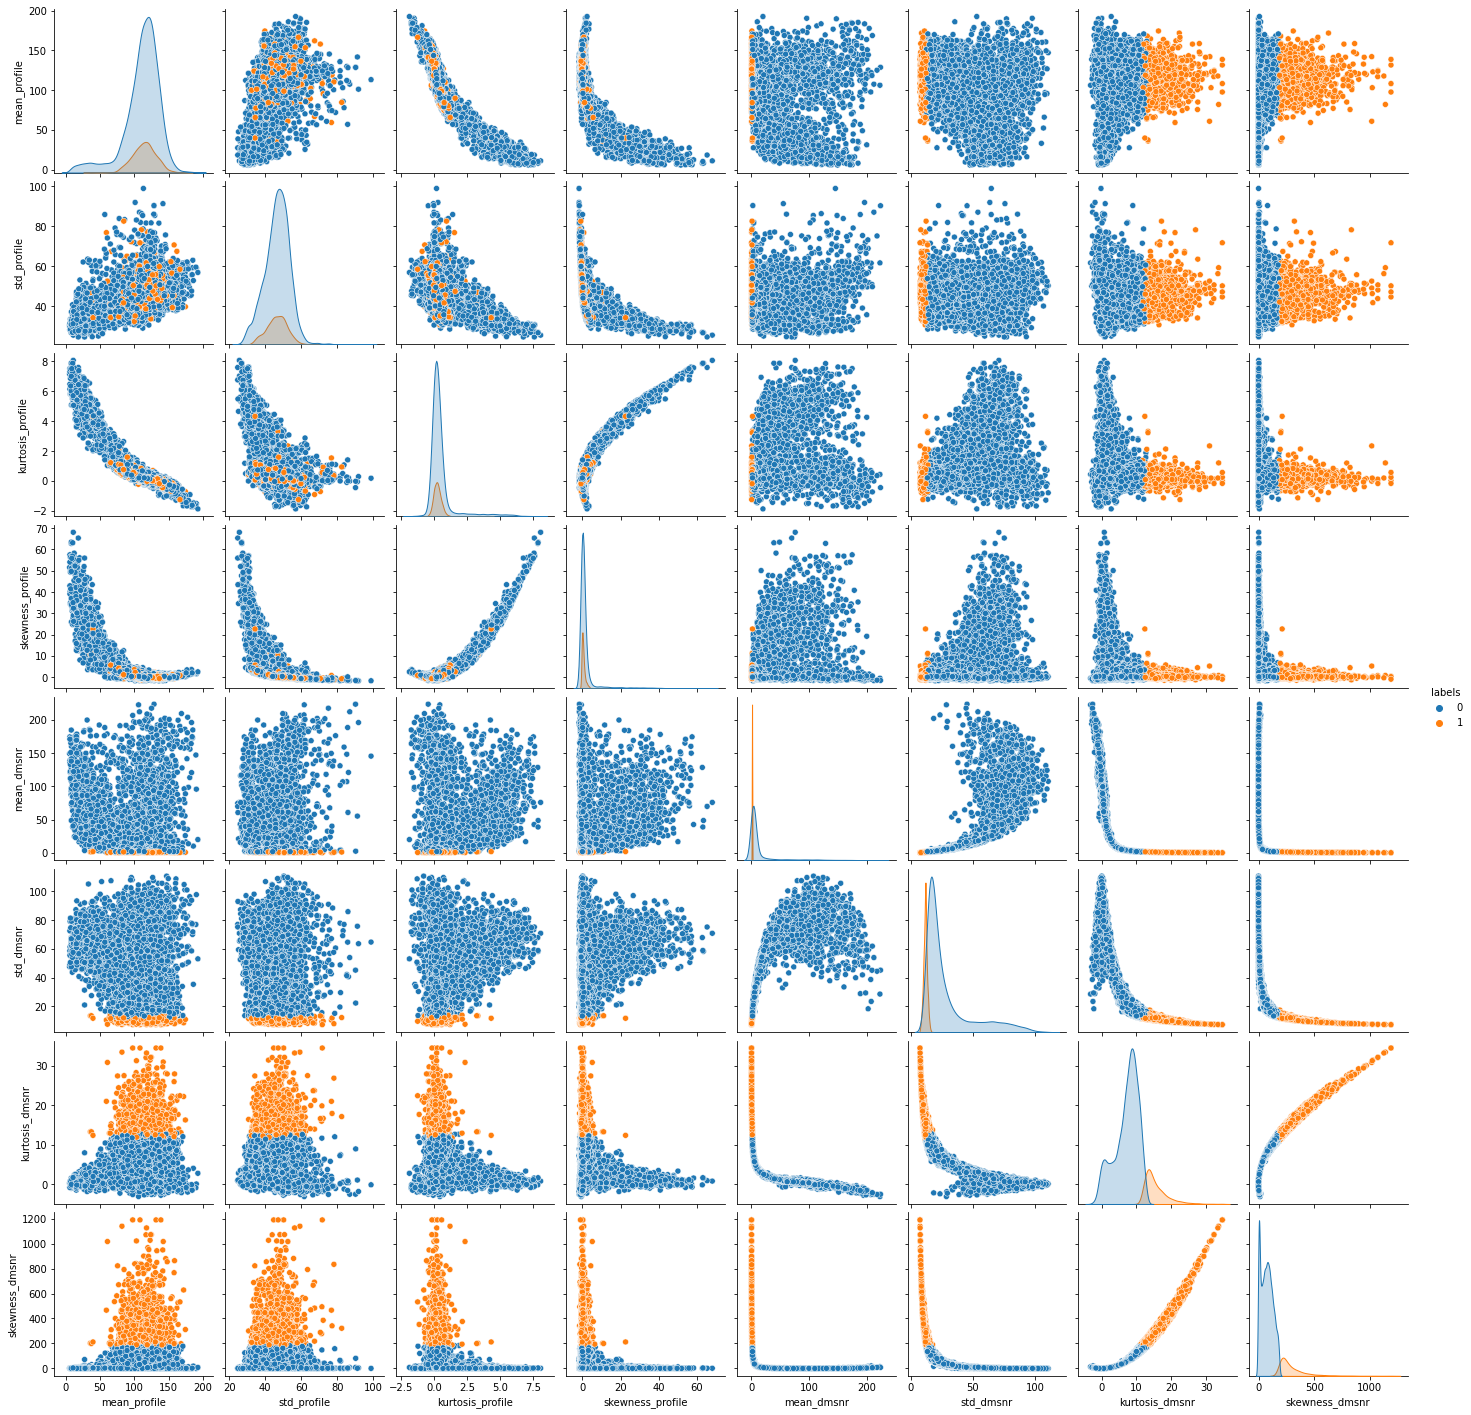

In [31]:
sns.pairplot(labeledCluster, hue='labels')

In [32]:
contingency_matrix(HTRU.target, kmeans.labels_)

array([[13697,  2561],
       [ 1609,    30]])

In [33]:
kmeans.cluster_centers_

array([[1.10527569e+02, 4.65521263e+01, 5.17226051e-01, 1.98820166e+00,
        1.45524370e+01, 2.88229047e+01, 7.08380776e+00, 7.19039277e+01],
       [1.14337701e+02, 4.65306451e+01, 2.45146090e-01, 4.81556127e-01,
        1.14863325e+00, 1.15555386e+01, 1.55222168e+01, 2.99891726e+02]])

Hierarchical Clustering and how to Perform it in Python

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [35]:
HTRU_X.head()

mean_profile  std_profile  ...  kurtosis_dmsnr  skewness_dmsnr
0    102.507812    58.882430  ...       10.576487      127.393580
1    103.015625    39.341649  ...        7.735822       63.171909
2    136.750000    57.178449  ...        6.896499       53.593661
3     88.726562    40.672225  ...       14.269573      252.567306
4     93.570312    46.698114  ...       10.621748      131.394004

[5 rows x 8 columns]

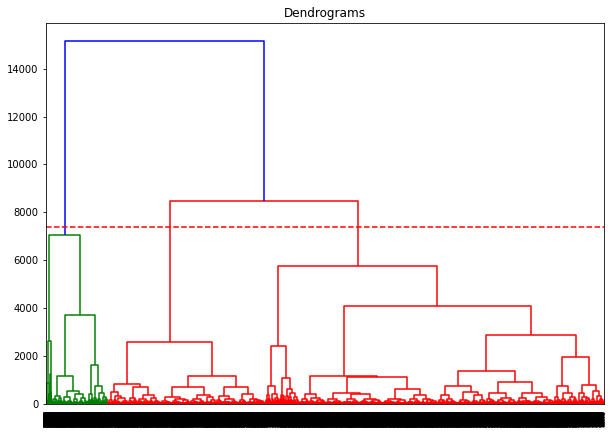

In [36]:
#create dendrogram
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dendrogram = sch.dendrogram(sch.linkage(HTRU_X, method='ward'))
plt.axhline(y=7400, color='r', linestyle='--')

from here if we cut longest blue line then we will get 3 cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(HTRU_X)

array([2, 1, 1, ..., 1, 2, 1])

In [ ]:
pd.DataFrame(cluster.labels_,columns=[0])

0
0      2
1      1
2      1
3      0
4      2
...   ..
17892  0
17893  1
17894  1
17895  2
17896  1

[17897 rows x 1 columns]

In [ ]:
labeledCluster = pd.concat((HTRU_X, pd.DataFrame(cluster.labels_,columns=[0])), axis=1)
labeledCluster = labeledCluster.rename({0:'labels'}, axis = 1)
labeledCluster.iloc[0:10]

mean_profile  std_profile  ...  skewness_dmsnr  labels
0    102.507812    58.882430  ...      127.393580       2
1    103.015625    39.341649  ...       63.171909       1
2    136.750000    57.178449  ...       53.593661       1
3     88.726562    40.672225  ...      252.567306       0
4     93.570312    46.698114  ...      131.394004       2
5    119.484375    48.765059  ...      479.756567       0
6    130.382812    39.844056  ...      198.236457       2
7    107.250000    52.627078  ...      107.972506       2
8    107.257812    39.496488  ...       57.784738       1
9    142.078125    45.288073  ...       37.831393       1

[10 rows x 9 columns]

In [ ]:
labeledCluster['labels'].value_counts()

1    10827
2     5080
0     1990
Name: labels, dtype: int64

In [ ]:
contingency_matrix(HTRU.target, cluster.labels_)

array([[1969, 9251, 5038],
       [  21, 1576,   42]])

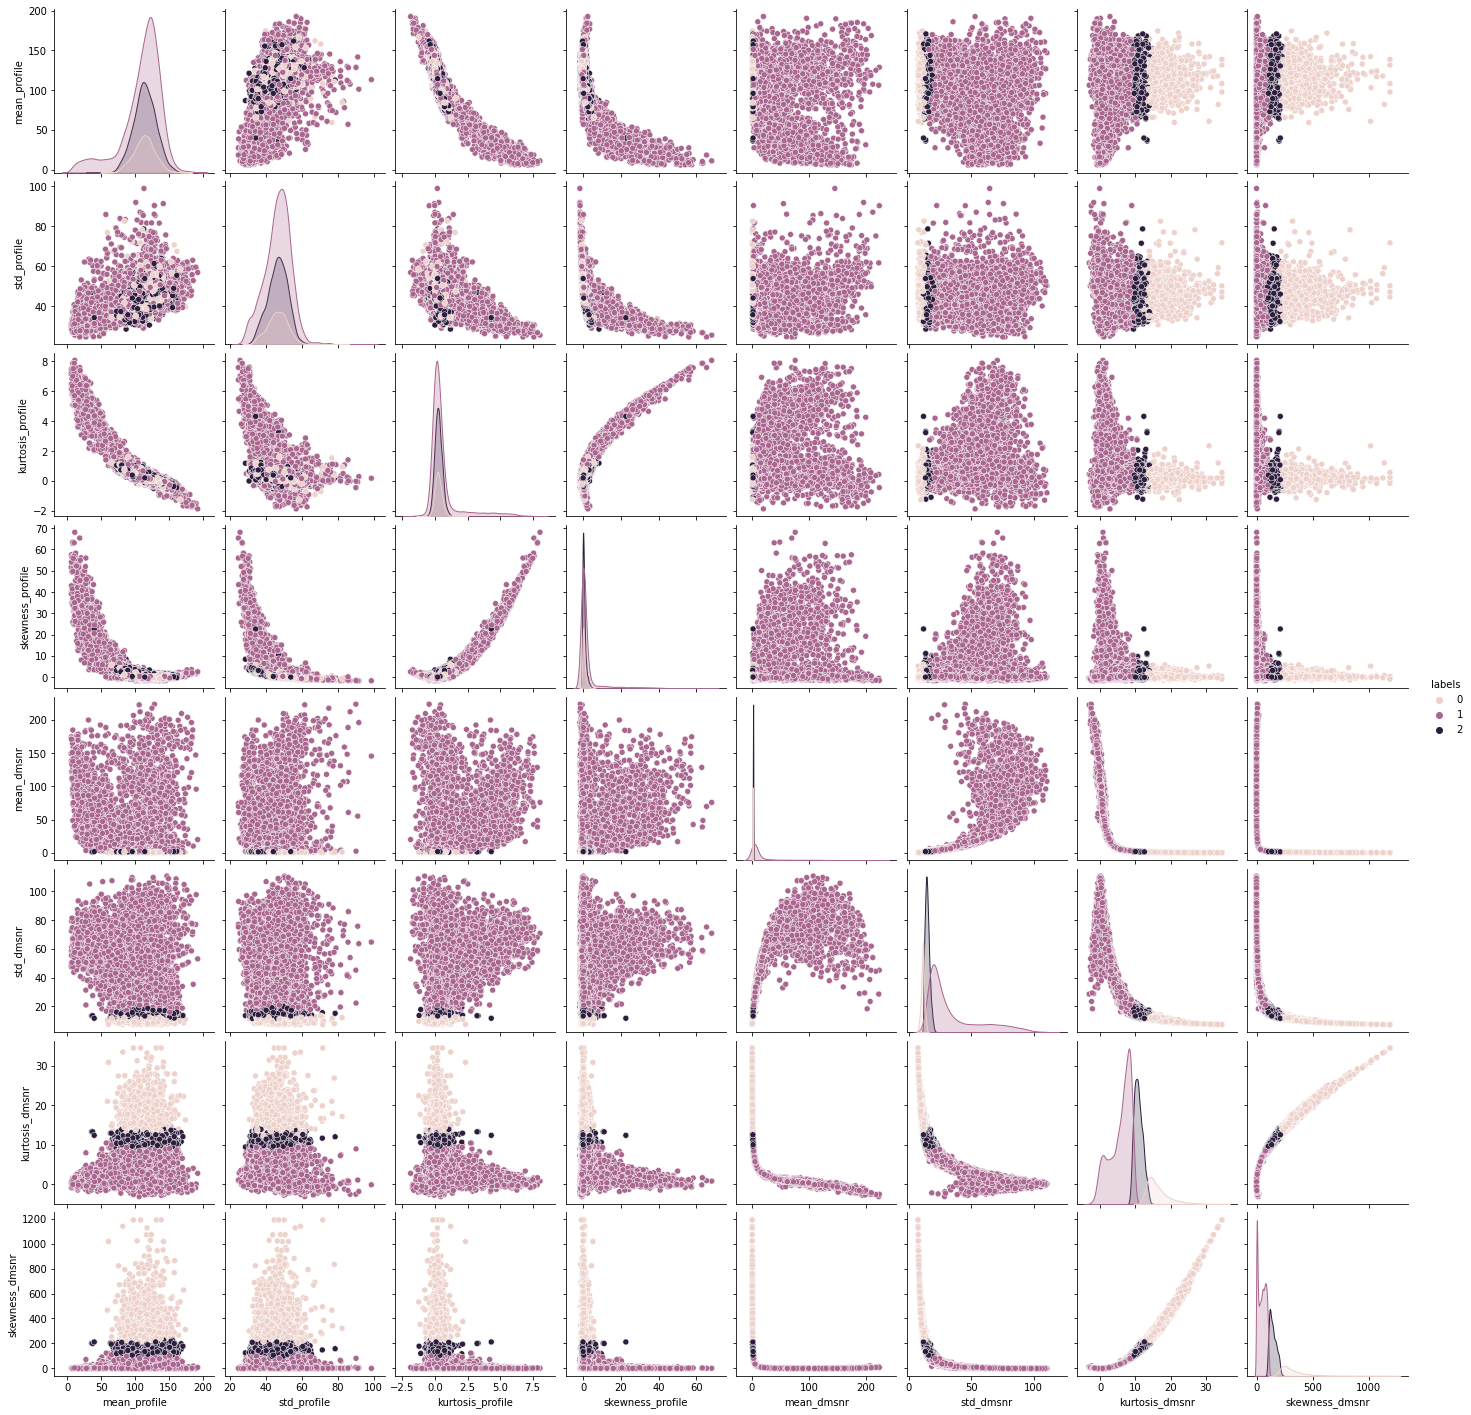

In [ ]:
sns.pairplot(labeledCluster, hue='labels')